In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.5)
%matplotlib inline
import math
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('C:/Users/MalaniR/Downloads/BNB 5 Year prices.csv', index_col='Date')

In [3]:
df.head()

,Close,Open,High,Low,Vol.
Date,,,,,
15/04/2018,13.10,13.27,13.62,12.90,3.85M
16/04/2018,12.23,13.10,13.10,12.01,2.71M
17/04/2018,11.74,12.23,12.48,11.67,2.44M
18/04/2018,12.30,11.74,12.44,11.51,2.74M
19/04/2018,12.35,12.30,12.43,12.05,2.40M


In [4]:
df = df["Close"].dropna()
df.size

1827

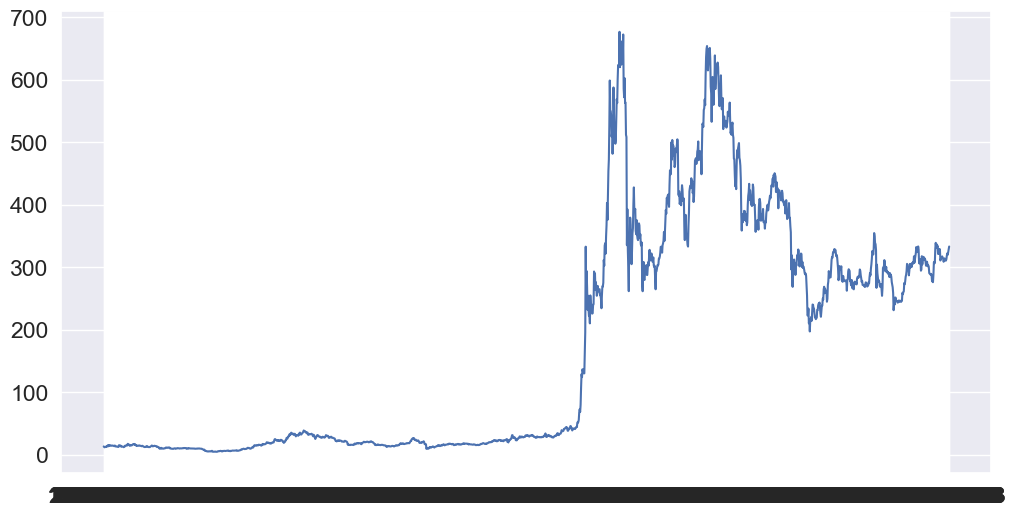

In [5]:
plt.figure(figsize=(12,6))
plt.plot(df)

In [6]:
data = df.iloc[:]
hist = []
target = []
length = 720
for i in range(len(data)-length):
    x = data[i:i+length]
    y = data[i+length]
    hist.append(x)
    target.append(y)

In [7]:
print(hist[1][719])
print(data[720])
print(target[0])

13.76
13.76
13.76


In [8]:
hist = np.array(hist)
target = np.array(target)
target = target.reshape(-1,1)

In [9]:
hist = np.array(hist)
target = np.array(target)
target = target.reshape(-1,1)

In [10]:
hist.shape

(1107, 720)

In [11]:
target.shape

(1107, 1)

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
hist_scaled = sc.fit_transform(hist)
target_scaled = sc.fit_transform(target)

In [13]:
hist_scaled = hist_scaled.reshape((len(hist_scaled), length, 1))
print(hist_scaled.shape)

(1107, 720, 1)


In [14]:
X_train = hist_scaled[:997,:,:]
X_test = hist_scaled[997:,:,:]
y_train = target_scaled[:997,:]
y_test = target_scaled[997:,:]

In [15]:
import tensorflow as tf
from tensorflow.keras import layers

In [16]:
model = tf.keras.Sequential()
model.add(layers.LSTM(units=32, return_sequences=True,
                  input_shape=(720,1), dropout=0.2))
model.add(layers.LSTM(units=32, return_sequences=True,
                  dropout=0.2))
model.add(layers.LSTM(units=32, dropout=0.2))
model.add(layers.Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 720, 32)           4352      
                                                                 
 lstm_1 (LSTM)               (None, 720, 32)           8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
32/32 [==============================] - 44s 1s/step - loss: 0.0332
Epoch 2/30
32/32 [==============================] - 34s 1s/step - loss: 0.0092
Epoch 3/30
32/32 [==============================] - 40s 1s/step - loss: 0.0084
Epoch 4/30
32/32 [==============================] - 37s 1s/step - loss: 0.0075
Epoch 5/30
32/32 [==============================] - 37s 1s/step - loss: 0.0073
Epoch 6/30
32/32 [==============================] - 35s 1s/step - loss: 0.0081
Epoch 7/30
32/32 [==============================] - 41s 1s/step - loss: 0.0075
Epoch 8/30
32/32 [==============================] - 39s 1s/step - loss: 0.0075
Epoch 9/30
32/32 [==============================] - 37s 1s/step - loss: 0.0074
Epoch 10/30
32/32 [==============================] - 38s 1s/step - loss: 0.0072
Epoch 11/30
32/32 [==============================] - 37s 1s/step - loss: 0.0070
Epoch 12/30
32/32 [==============================] - 36s 1s/step - loss: 0.0065
Epoch 13/30
32/32 [==============================

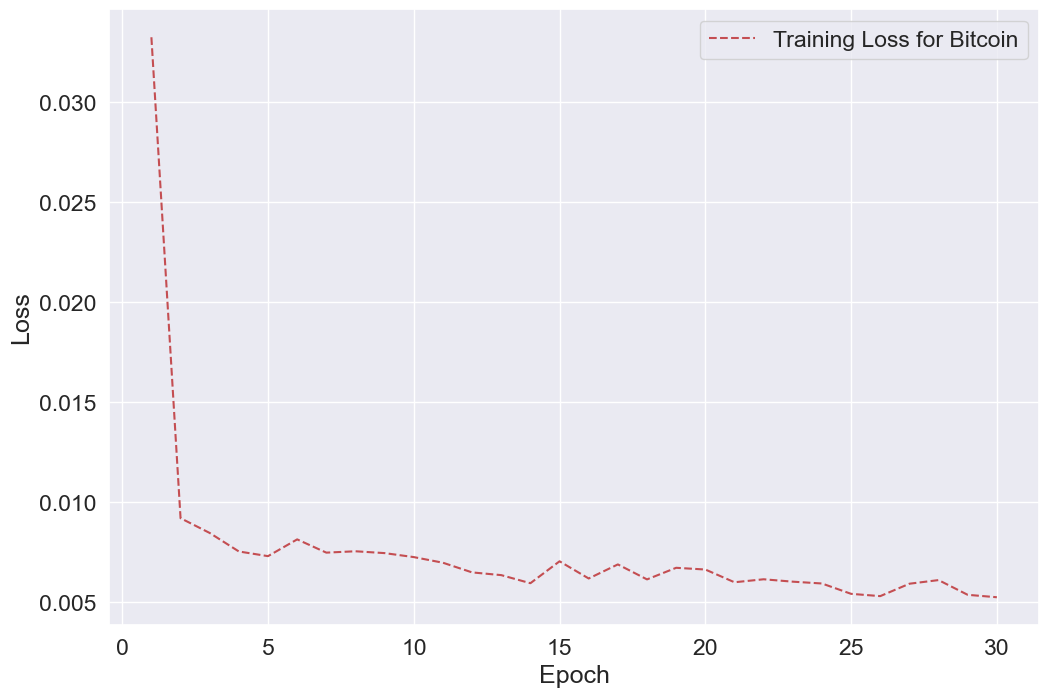

In [19]:
loss = history.history['loss']
epoch_count = range(1, len(loss) + 1)
plt.figure(figsize=(12,8))
plt.plot(epoch_count, loss, 'r--')
plt.legend(['Training Loss for Bitcoin'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

4/4 [==============================] - 2s 139ms/step


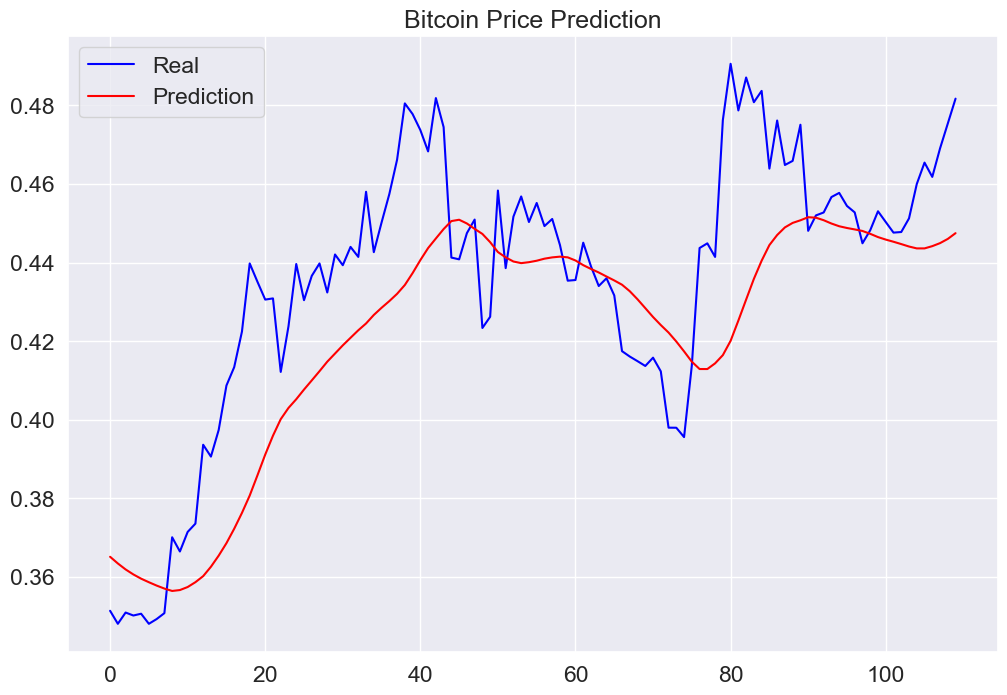

In [20]:
pred = model.predict(X_test)
plt.figure(figsize=(12,8))
plt.plot(y_test, color='blue', label='Real')
plt.plot(pred, color='red', label='Prediction')
plt.title('Bitcoin Price Prediction')
plt.legend()
plt.show()

4/4 [==============================] - 1s 123ms/step


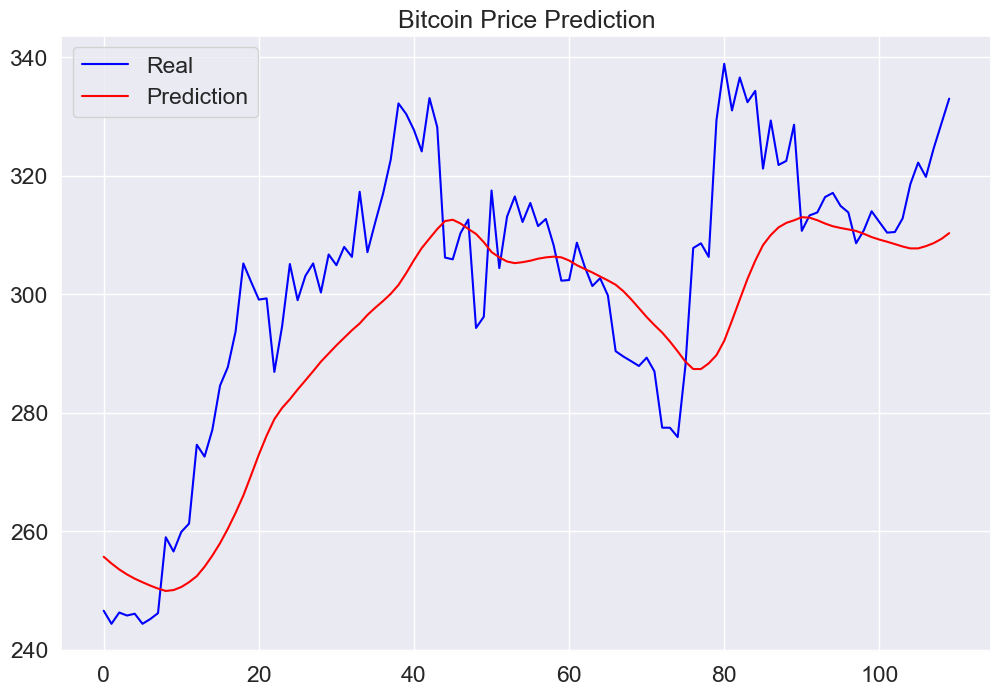

In [21]:
pred_transformed = sc.inverse_transform(pred)
y_test_transformed = sc.inverse_transform(y_test)

pred = model.predict(X_test)
plt.figure(figsize=(12,8))
plt.plot(y_test_transformed, color='blue', label='Real')
plt.plot(pred_transformed, color='red', label='Prediction')
plt.title('Bitcoin Price Prediction')
plt.legend()
plt.show()

In [22]:
math.sqrt(mean_squared_error(y_test_transformed, pred_transformed))

16.55743143034101

In [23]:
from sklearn.metrics import mean_absolute_error as mae
error = mae(y_test_transformed, pred_transformed)
print("Mean absolute error : " + str(error))

Mean absolute error : 13.21993292236328


In [24]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

error2 = mean_absolute_percentage_error(y_test_transformed, pred_transformed)
print("MAPE: ", error2)

MAPE:  4.323556353751233
